In [1]:
import os
import pandas as pd
import math
from prettytable import PrettyTable
from operator import itemgetter
import matplotlib.pyplot as plt

## Computing number of samples as a function of epsilon and the other way around

In [2]:
def compute_n(c, delta, epsilon, size_of_market):
    return (c / epsilon) * (c / epsilon) * 0.5 * math.log((2 * size_of_market) / delta)

In [3]:
def compute_eps(c, delta, size_of_market, number_of_samples):
    return c * math.sqrt((math.log((2.0 * size_of_market) / delta)) / (2.0 * number_of_samples))

### Testing eps to n and n to eps functions

In [4]:
c = 2
delta = 0.1
epsilon = 0.05
size_of_market = 4224
n = compute_n(c, delta, epsilon, size_of_market)
assert epsilon == compute_eps(c, delta, size_of_market, n)
assert n == compute_n(c, delta, epsilon, size_of_market)

## Compute Statistics from LSVM worlds

In [5]:
results_dir = '../LSVM/experiments/'

In [6]:
def compare_ea_eap(experiment_number, world_number):
    loc = f"{results_dir}{experiment_number}/worlds_results/word{world_number}/"
    # Read EAP data.
    bidders_final_values_df = pd.read_csv(f"{loc}bidders_final_values.csv")
    eap_samples = bidders_final_values_df['n'].sum()
    
    # Compute EA data.
    bidders_summary_df = pd.read_csv(f"{loc}bidders_summary.csv")
    params_csv = pd.read_csv(f"{loc}params.csv")
    c, delta, epsilon = int(params_csv.iloc[3]['value']), sum(eval(params_csv.iloc[1]['value'])), float(params_csv.iloc[6]['value'])
    size_of_market = sum([2 ** len(eval(row[2])) for row in bidders_summary_df.itertuples()])
    ea_samples = compute_n(c, delta, epsilon, size_of_market) * size_of_market
    #print(f"c = {c}, delta = {delta}, epsilon = {epsilon : .4f}, size_of_market = {size_of_market}")
    #print(f"{ ea_samples : ,.0f}")
    #print(f"{ eap_samples : ,}")
    
    return [world_number, 
            c, 
            delta, 
            epsilon, 
            size_of_market,
            ea_samples, 
            eap_samples,
            (eap_samples / ea_samples) * 100.0]

In [7]:
# Collect results from all experiments. 
results = []
for e in [0, 1]:
    for i in range(0, 100):
        results += [compare_ea_eap(e, i)]

# Sort by ratio
results = sorted(results, key=itemgetter(7))

# Construct ptable
results_ptable = PrettyTable()
results_ptable.field_names = ['world', 'c', 'delta', 'epsilon', 'size_of_market', 'ea', 'eap', 'ratio']
results_ptable.align["ea"] = "r"
results_ptable.align["eap"] = "r"

for r in results:
    results_ptable.add_row([r[0], 
                            r[1], 
                            r[2], 
                            f"{r[3] : .4f}", 
                            f"{r[4] : ,}", 
                            f"{r[5] : ,.0f}", 
                            f"{r[6] : ,.0f}", 
                            f"{r[7] : .4f}"])
print(results_ptable)

+-------+---+-------+---------+----------------+--------------+----------+---------+
| world | c | delta | epsilon | size_of_market |           ea |      eap |  ratio  |
+-------+---+-------+---------+----------------+--------------+----------+---------+
|   67  | 2 |  0.1  |  0.0346 |      7,424     |  147,554,103 |  125,270 |  0.0849 |
|   29  | 2 |  0.1  |  0.0346 |      6,528     |  128,344,499 |  116,940 |  0.0911 |
|   64  | 2 |  0.1  |  0.0346 |      6,336     |  124,253,964 |  114,480 |  0.0921 |
|   33  | 2 |  0.1  |  0.0346 |      6,272     |  122,892,597 |  115,640 |  0.0941 |
|   26  | 2 |  0.1  |  0.0346 |      6,336     |  124,253,964 |  119,250 |  0.0960 |
|   43  | 2 |  0.1  |  0.0346 |      6,400     |  125,616,411 |  124,120 |  0.0988 |
|   86  | 2 |  0.1  |  0.0346 |      5,440     |  105,298,345 |  104,890 |  0.0996 |
|   96  | 2 |  0.1  |  0.0346 |      5,440     |  105,298,345 |  105,430 |  0.1001 |
|   37  | 2 |  0.1  |  0.0346 |      5,120     |   98,586,258 |  

## Plots

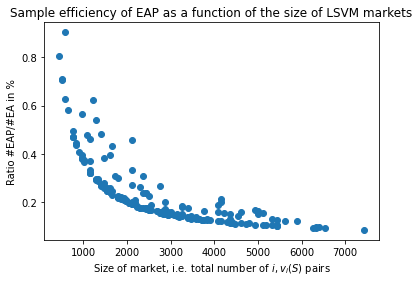

In [8]:
results = sorted(results, key=itemgetter(4), reverse=True)
fig, ax = plt.subplots()
plt.scatter([result[4] for result in results], [result[7] for result in results])
plt.xlabel(r'Size of market, i.e. total number of $i, v_i(S)$ pairs')
plt.ylabel('Ratio #EAP/#EA in %')
plt.title('Sample efficiency of EAP as a function of the size of LSVM markets')
plt.show()